In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForMaskedLM
from tqdm.notebook import tqdm
from scipy.stats import spearmanr

from bio_if.data.utils import FastaDataset, CachedEmbedTokenizer
from bio_if.modules.mlp import MLPBlock

In [2]:
tokenizer_fn = CachedEmbedTokenizer('~/.cache/bio_if/facebook/esm2_t6_8M_UR50D/gb1.pt')

In [3]:
train = FastaDataset('../src/bio_if/data/FLIP/gb1/sampled.fasta', split='train', tokenizer_fn=tokenizer_fn)
val = FastaDataset('../src/bio_if/data/FLIP/gb1/sampled.fasta', split='val', tokenizer_fn=tokenizer_fn)
test = FastaDataset('../src/bio_if/data/FLIP/gb1/sampled.fasta', split='test', tokenizer_fn=tokenizer_fn)

In [4]:
# define an MLP
def init_regressor():
    D = 256
    return nn.Sequential(
        MLPBlock(320, D, use_relu=True),
        MLPBlock(D, D, use_relu=True),
        MLPBlock(D, 1, use_relu=False)
    )

In [5]:
train_dataloader = train.get_dataloader(batch_size=32, shuffle=True, drop_last=True)
val_dataloader = val.get_dataloader(batch_size=32, shuffle=False, drop_last=False)
test_dataloader = test.get_dataloader(batch_size=32, shuffle=False, drop_last=False)

In [6]:
def get_val_loss(model, dataloader, criterion):
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in dataloader:
            input_ids, labels = batch
            outputs = model(input_ids).squeeze()
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    return val_loss / len(dataloader)

  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 0 train loss: 1.5285497292572139
Epoch 0 val loss: 1.3917966322465376


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 1 train loss: 1.4156444024066537
Epoch 1 val loss: 1.3583464216102252


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 2 train loss: 1.308382282299655
Epoch 2 val loss: 1.2233029441400007


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 3 train loss: 1.2654529609242264
Epoch 3 val loss: 1.1986480246890674


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 4 train loss: 1.2298238858276485
Epoch 4 val loss: 1.2094171291047877


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 5 train loss: 1.2353806716142868
Epoch 5 val loss: 1.3795056586915797


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 6 train loss: 1.2363168191240759
Epoch 6 val loss: 1.272382533008402


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 7 train loss: 1.2154256379117772
Epoch 7 val loss: 1.201261731711301


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 8 train loss: 1.2069228367537868
Epoch 8 val loss: 1.177249480377544


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 9 train loss: 1.165110315291249
Epoch 9 val loss: 1.131223586472598


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 10 train loss: 1.1807591706818463
Epoch 10 val loss: 1.2686815288933841


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 11 train loss: 1.2074569152021895
Epoch 11 val loss: 1.1416269351135602


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 12 train loss: 1.1850795577071151
Epoch 12 val loss: 1.133622871203856


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 13 train loss: 1.1541044792654562
Epoch 13 val loss: 1.1714327294718136


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 14 train loss: 1.16824321509624
Epoch 14 val loss: 1.1191843179139225


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 15 train loss: 1.1560170571414792
Epoch 15 val loss: 1.2353580499237233


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 16 train loss: 1.1387965776482407
Epoch 16 val loss: 1.2590020353143865


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 17 train loss: 1.1503097056126108
Epoch 17 val loss: 1.331376774744554


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 18 train loss: 1.1181053201458893
Epoch 18 val loss: 1.0830537717450748


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 19 train loss: 1.111703335782703
Epoch 19 val loss: 1.0719199221242557


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 20 train loss: 1.1833686872708553
Epoch 20 val loss: 1.3032195270061493


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 21 train loss: 1.1591161757099384
Epoch 21 val loss: 1.0970617884939367


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 22 train loss: 1.1158908614698722
Epoch 22 val loss: 1.0639165856621482


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 23 train loss: 1.143554177363308
Epoch 23 val loss: 1.1127450249411843


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 24 train loss: 1.1266365975749737
Epoch 24 val loss: 1.063710006800565


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 25 train loss: 1.1415133667843682
Epoch 25 val loss: 1.0599085959521206


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 26 train loss: 1.1299063348952605
Epoch 26 val loss: 1.1208549859848889


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 27 train loss: 1.0940162256664159
Epoch 27 val loss: 1.0471720424565403


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 28 train loss: 1.0831187210825024
Epoch 28 val loss: 1.0498047457499937


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 29 train loss: 1.0878445148772122
Epoch 29 val loss: 1.1475893001664768


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 30 train loss: 1.0900480954014524
Epoch 30 val loss: 1.0778755342418498


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 31 train loss: 1.0720131993293762
Epoch 31 val loss: 1.0343971401453018


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 32 train loss: 1.0971871699605669
Epoch 32 val loss: 1.0399464572017842


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 33 train loss: 1.080917782929479
Epoch 33 val loss: 1.016117343848402


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 34 train loss: 1.1001939927132762
Epoch 34 val loss: 1.0157510096376592


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 35 train loss: 1.0975334749233967
Epoch 35 val loss: 1.0717344202778556


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 36 train loss: 1.0962281040087039
Epoch 36 val loss: 1.1089495610107074


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 37 train loss: 1.057443015353412
Epoch 37 val loss: 1.0392978489398956


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 38 train loss: 1.057588876510153
Epoch 38 val loss: 1.0012800747698003


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 39 train loss: 1.07746735838603
Epoch 39 val loss: 1.0257765704935247


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 40 train loss: 1.0432952396115478
Epoch 40 val loss: 1.000126826492223


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 41 train loss: 1.0739904036175232
Epoch 41 val loss: 0.9929943626577203


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 42 train loss: 1.0494724109160656
Epoch 42 val loss: 1.0068993879990145


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 43 train loss: 1.0279169076559496
Epoch 43 val loss: 0.9792519794269041


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 44 train loss: 1.0593424381650225
Epoch 44 val loss: 1.016486096111211


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 45 train loss: 1.017922776846253
Epoch 45 val loss: 0.9784974631938067


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 46 train loss: 1.0091882636960672
Epoch 46 val loss: 1.0501496534455905


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 47 train loss: 1.0839255079627037
Epoch 47 val loss: 1.0396966988390142


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 48 train loss: 1.0759112143090792
Epoch 48 val loss: 1.0085058144547723


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 49 train loss: 1.0520989625733725
Epoch 49 val loss: 1.0491231923753566


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 50 train loss: 1.046331451711606
Epoch 50 val loss: 1.1166936971924522


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 51 train loss: 1.0603717402840147
Epoch 51 val loss: 0.9940294907851652


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 52 train loss: 1.0172318458861234
Epoch 52 val loss: 0.9642935896461661


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 53 train loss: 1.0099672945786495
Epoch 53 val loss: 0.9634711173447695


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 54 train loss: 1.0292855492051767
Epoch 54 val loss: 0.9959341355345466


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 55 train loss: 1.0804318280852572
Epoch 55 val loss: 1.050145837393674


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 56 train loss: 1.026939193737142
Epoch 56 val loss: 0.9953341822732579


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 57 train loss: 1.05907333338139
Epoch 57 val loss: 1.0487677617506548


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 58 train loss: 1.0489241202570954
Epoch 58 val loss: 1.0390885038809343


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 59 train loss: 1.012295711101318
Epoch 59 val loss: 1.1525564871051095


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 60 train loss: 1.0764231187652569
Epoch 60 val loss: 0.9661382667042993


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 61 train loss: 1.0373435253087355
Epoch 61 val loss: 1.013164762746204


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 62 train loss: 1.036489308184507
Epoch 62 val loss: 0.9585907405072992


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 63 train loss: 1.0942219538348061
Epoch 63 val loss: 1.2451908520676873


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 64 train loss: 1.03817383017467
Epoch 64 val loss: 0.9560468901287426


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 65 train loss: 1.0208104649672702
Epoch 65 val loss: 0.9783333756706931


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 66 train loss: 1.0327834531056637
Epoch 66 val loss: 0.9522544023665515


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 67 train loss: 1.0723823679953206
Epoch 67 val loss: 0.9656714187427


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 68 train loss: 1.0216927689557174
Epoch 68 val loss: 0.9843283078887246


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 69 train loss: 1.0579807667099699
Epoch 69 val loss: 1.0487186231396415


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 70 train loss: 1.067153459452853
Epoch 70 val loss: 1.3254337757825851


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 71 train loss: 1.0902663393288243
Epoch 71 val loss: 1.037647472186522


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 72 train loss: 1.0401924612874887
Epoch 72 val loss: 1.0410344939340244


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 73 train loss: 1.0210444989557168
Epoch 73 val loss: 0.9869001101363789


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 74 train loss: 1.0321848360555512
Epoch 74 val loss: 1.043189065022902


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 75 train loss: 1.0483959101292553
Epoch 75 val loss: 0.9607215496626768


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 76 train loss: 1.0428988708525289
Epoch 76 val loss: 1.1012869585644116


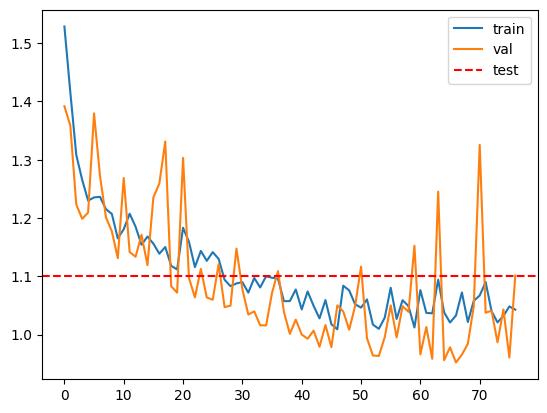

In [7]:
EPOCHS = 100
N_VAL_ATTEMPTS = 10
LR = 1e-3

loss_fn = nn.MSELoss()
best_val_loss = float('inf')

val_failures = 0
model = init_regressor()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=0.1, )

losses = []
for epoch in range(EPOCHS):
    model.train()
    train_loss = 0
    for batch in tqdm(train_dataloader):
        input_ids, labels = batch
        outputs = model(input_ids).squeeze()
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_loss += loss.item()

    val_loss = get_val_loss(model, val_dataloader, loss_fn)
    print(f'Epoch {epoch} train loss: {train_loss / len(train_dataloader)}')
    print(f'Epoch {epoch} val loss: {val_loss}')
    losses.append((train_loss / len(train_dataloader), val_loss))

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        val_failures = 0
    else:
        val_failures += 1
        if val_failures >= N_VAL_ATTEMPTS:
            break

# make a plot of the training and validation losses
train_losses, val_losses = zip(*losses)
test_loss = get_val_loss(model, test_dataloader, loss_fn)
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.axhline(test_loss, color='r', linestyle='--', label='test')
plt.legend()

In [8]:
def get_correlation(model, dataloader):
    model.eval()
    preds = []
    labels = []
    with torch.no_grad():
        for batch in dataloader:
            input_ids, label = batch
            outputs = model(input_ids).squeeze()
            preds.append(outputs)
            labels.append(label)
    preds = torch.cat(preds).numpy(force=True)
    labels = torch.cat(labels).numpy(force=True)
    return spearmanr(preds, labels), preds, labels

Train correlation: SignificanceResult(statistic=0.6766148294092602, pvalue=0.0)
Val correlation: SignificanceResult(statistic=0.6557160253150623, pvalue=3.932868206773302e-87)
Test correlation: SignificanceResult(statistic=0.6462095558780416, pvalue=7.404823337675718e-207)


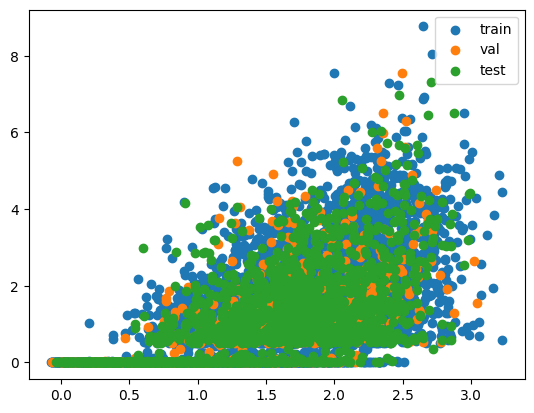

In [9]:
print(f"Train correlation: {get_correlation(model, train_dataloader)[0]}")
print(f"Val correlation: {get_correlation(model, val_dataloader)[0]}")
print(f"Test correlation: {get_correlation(model, test_dataloader)[0]}")
# make plot of 3 different correlations
_, train_preds, train_labels = get_correlation(model, train_dataloader)
_, val_preds, val_labels = get_correlation(model, val_dataloader)
_, test_preds, test_labels = get_correlation(model, test_dataloader)

plt.scatter(train_preds, train_labels, label='train')
plt.scatter(val_preds, val_labels, label='val')
plt.scatter(test_preds, test_labels, label='test')
plt.legend()

In [10]:
# compute influence function of the model
from bio_if.modules.influence import influence

In [11]:
# turn train dataset into a list
train_list = list(train)
test_list = list(test)

# "tokenize" the first value of each tuple
train_list = [(tokenizer_fn(x).reshape(1, -1), y) for x, y in train_list]
test_list = [(tokenizer_fn(x).reshape(1, -1), y) for x, y in test_list]

In [12]:
if_vals = influence(model, list(model), test_list, train_list, train_list, 5, 'cpu', torch.nn.functional.mse_loss)

/Users/cadegordon/Documents/projects/bio-if/src/bio_if/modules/influence.py:59: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = loss_fn(output, target)
/Users/cadegordon/Documents/projects/bio-if/src/bio_if/modules/influence.py:94: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = loss_fn(output, target)


KeyboardInterrupt: 